
# <center>Lab Notebook</center>
## Javier Palma Espinosa, Electrical Engineer

### TODO
* <s>entender cómo está construido modelo4r.hoc</s>
* <s>entender código sac-red</s>
* incorporar 2 tipos de bipolares con distinto perfil temporal
* Escribir nuevo script para incluir la modificación del valor de tau en la alpha synapse
* <s>Code refractoring</s>
* Buscar parámetros de $\tau$ en la literatura
* <s>Hacer documentación de código y code refractoring. Diego me sugirió que utilizara json como gestor de salida para parámetros</s>

### Avances
#### 15 Nov 2016
1. Analisis de poster-2015
2. qué pasa con la DS modificando X factor en la red
3. prototipar procesos paralelos y después montar en cluster
  * repetir fig 1
  * repetir con 1 sac en la red
4. generar el heatmap

#### 24 Nov 2016
análisis y comentarios de net5module.py

#### 7 de dic 2016
Se realizaron las simulaciones empleando contsyn.mod

#### 14 de dic 2016
Se realizaron las simulaciones empleando aCsyn.mod

#### 20 y 21 de dic 2016
Modificación a los scripts que generan los outputs. Se crearon scipts para cada tipo de modelo de conductancia, pues era la opción más rápida para correr los códigos.  Se debe hacer una batería de experimentos. Se realizarán la próxima semana.


# <center>Avances al 14 de diciembre</center>
Para verificar cómo modificaba la conductancia glutamatérgica a la selectividad de la dirección, fue necesario realizar dos simulaciones: usando sinapsis sinusoidal y usando sinapsis convolucional

* La primera simulación fue usando la sinapsis de tipo sinuosidal 
$g=g_{min}+(g_{max}-g_{min}) \sin(\pi*(\frac{t -t_{on}}{dur}))$ 
definida en contsyn.mod), barriendo conductancia y velocidades.  Los parámetros de la simulación están incluidos a continuación

In [ ]:
# %load ../experiments/sac-red/results/20161207/PARAMETERS_sinsyn.txt
								PARAMETERS

'''
DATA FILES
'''

CELL_GEOMETRY = "../data/celldata04.txt" 
GABA_SYN_INPUT = "../data/syndata04.txt"

'''
RECORDING
'''
Recorded_Amacrine_Cells=(13,19,83,89)

'''
NEURON SIMULATION OPTIONS
'''
h.tstop = 1500                  #simulation time in milliseconds
h.CVode().active(1)
h.cvode.atol(1e-5)
h.v_init= -60                  #init voltage

'''
AMACRINES
'''
#nrow = 4 #número de SAC por fila
#ncol = 5 #número de SAC por columna
ndend = 4               # dendrites number
dendseg = 3             # dendrites' segments
diam_min = 0.5          # min dendrite diameter
diam_max = 1.5          # max dendritic diam

'''
BIPOLAR
'''
#Sinaptic input parameters for bipolar cells
d_is = 15 		    # mean distance between synaptic input 
v_es = 1 		    # stim speed [um/us]
t_es = 100 		    # stabilization time [ms]
width = 30           # stimuli width [um]
excGmax=0.000001     # 0.00001 Max excitatory conductance 0.0000380
excGmin=0.0000001    # Min excitatory conductance

'''
GABA SACs
'''
k1 = 2
k2 = 0.8
th1 = -40
th2 = 0.8   
gabaGmin=0.000005
gabaGmax=0.0008

'''
SYNAPSE USED
'''
h.ContSynapse

'''
SIMUlATION PARAMETERS
'''
gmax = np.logspace(-6, -3, 29)
stimuliSpeed = np.logspace(-1, 2, 29)



* La segunda simulación mantuvo los mismos parámetros que la simulación anterior, sin embargo, se usó una sinapsis de tipo convolución de funcón alfa con un pulso cuadrado y se barrieron los mismos valores de conductancias y velocidades.
$dz = \frac{A}{\tau} - \frac{2*a_2}{\tau} - \frac{a_1}{\tau^2} $
Los parámetros de la simulación se muestran a continuación

In [ ]:
# %load ../experiments/sac-red/results/20161214/PARAMETERS_contSyn.txt
								PARAMETERS

'''
DATA FILES
'''

CELL_GEOMETRY = "../data/celldata04.txt" 
GABA_SYN_INPUT = "../data/syndata04.txt"

'''
RECORDING
'''
Recorded_Amacrine_Cells=(13,19,83,89)

'''
NEURON SIMULATION OPTIONS
'''
h.tstop = 1500                  #simulation time in milliseconds
h.CVode().active(1)
h.cvode.atol(1e-5)
h.v_init= -60                  #init voltage

'''
AMACRINES
'''
#nrow = 4 #número de SAC por fila
#ncol = 5 #número de SAC por columna
ndend = 4               # dendrites number
dendseg = 3             # dendrites' segments
diam_min = 0.5          # min dendrite diameter
diam_max = 1.5          # max dendritic diam

'''
BIPOLAR
'''
#Sinaptic input parameters for bipolar cells
d_is = 15 		    # mean distance between synaptic input 
v_es = 1 		    # stim speed [um/us]
t_es = 100 		    # stabilization time [ms]
width = 30           # stimuli width [um]
excGmax=0.000001     # 0.00001 Max excitatory conductance 0.0000380
excGmin=0.0000001    # Min excitatory conductance

'''
GABA SACs
'''
k1 = 2
k2 = 0.8
th1 = -40
th2 = 0.8   
gabaGmin=0.000005
gabaGmax=0.0008

'''
SYNAPSE USED
'''
h.ContSynapse

'''
SIMUlATION PARAMETERS
'''
gmax = np.logspace(-6, -3, 29)
stimuliSpeed = np.logspace(-1, 2, 29)



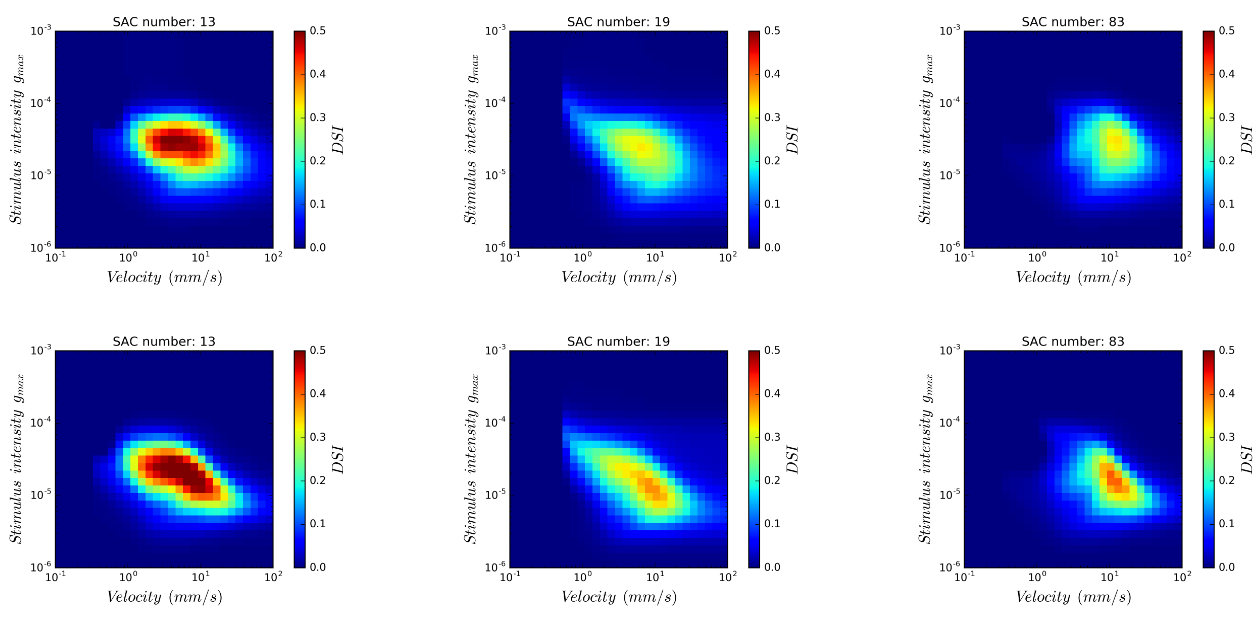

In [259]:
from IPython.display import Image,  display

display(Image(filename='img/all_heatmap.png', embed=True))

Las imagenes superiores corresponden a la simulación con una conductancia tipo sinusoidal, mientras que las imagenes inferiores corresponden a la simulación con conductancia tipo convolución.  Se observa que para la conductancia de convolución, la DSI se desplaza hacia la derecha y hacia abajo, es decir, se vuelve más sensible con menor conductancia y aumenta la velocidad a la que responde.

Como paso siguiente, es necesario realizar lo siguiente:
* Escoger un valor de $\tau$ según literatura para la convolución. Para ello, la idea es hacer una breve exploración     variando 1/2 orden de magnitud para arriba y abajo.
* Ancho de la barra: ¿Es necesario modificarlo?
* Seleccionar SACs en el centro-centro, algo así como 45, 55, 64.

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


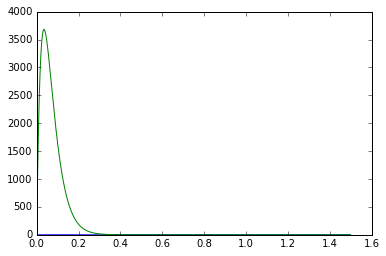

In [154]:
import numpy as np
#simulation parameters
t_start = 0
t_end   = 1.5
dt      = 0.0001
time=np.arange(t_start,t_end,dt)
nsteps=int(t_end/dt)

#Alpha function
tau=0.035
lenght=tau*12
xA=np.arange(0,lenght,dt)
alpha_function=xA*np.exp(-xA/tau)/tau

#Square pulse
light_stimuli = np.zeros(nsteps)
t_on = 200  #ms
duration = 500 #ms
t_off = t_on + duration
amplitude = 1
light_stimuli[t_start:t_end] = amplitude

g_conv=np.convolve(alpha_function,light_stimuli,mode='full')
g_conv=g_conv[:nsteps]

y0=y1=0
Y=np.zeros((len(time),2))
i=0

while i < len(time):
    Y[i]=(y0,y1)
    y0 += dt*y1    
    y1 += dt*(amplitude/(dt*tau) - 2*y1/tau - y0/tau**2)
    i+=1

plt.plot(time,g_conv);
plt.plot(time,Y[:,0])

# <center>Avances al 20 de diciembre</center>
Un correo de P.Orio me hizo ciertas preguntas ante las cuales le respondí.  

> ¿con qué valor de tau te vas a quedar en la aCsyn?

Empezaré a leer papers para ver qué valores plantean. 
En realidad lo que estaba pensando era en <b>hacer un barrido en n puntos entre tau_min y tau_max</b> (valores por determinar) y ver el punto máximo en el heatmap.

Esto nos fijaría un espacio de parámetros que me gustaría explorar:

<b>¿Cómo se modifica la velocidad del estímulo max y la conductancia minima ante diferentes valores de tau?</b>
Mi hipótesis es que tau está ajustado para maximizar la velocidad de estímulo ante cierto valor de conductancia.  Es decir, las cinéticas de los canales se ajustan para poder "agarrar" la barrita más rápida que se pueda.

Ahora, las cosas que hay que explorar:
> apagar las conexiones gabaergicas entre SAC (eso significa hacer maxG_GABAsyn=minG_GABAsyn, porque si sacas la sinapsis estás introduciendo un cambio global en la conductancia de membrana) y repetir el heatmap

Deal, esto se debiese hacer rápido, asique puede ser el primer heatmap a correr (posterior al control con las células del medio)
> Cambiar el E de las conductancias gabaergicas (e_GABAsyn): probar -80, -70, -60 (ese ya está), -50 y -40. Finalmente, hacer una con -70 distal y -50 proximal.

otro heatmap barriendo E? o paso a paso?
> Cambiar el tau de aCsyn: Un valor mayor en el tercio proximal (segmento 0 de las dendritas) y uno menor en el resto (segmentoss 1 y 2). Esto siguiendo a Kim 2014. Lo que todavía no sé es cuánto mayor y cuánto menor.

Esto creo que es solucionable con la hipótesis que planteé más arriba
> Pensé que Ding 2016 lo decía, pero ahora no lo encuentro. ¿puedes buscar?

obvio.

### TIPS AND TRICKS

1. Al llamar a cualquier código python, es mucho mejor eliminar la carpeta creada por *nrnivmodl* y luego recompilar, que compilar encima.  Así se evitan problemas de linkeo de librerías.
```bash
$rm -rf ./x86_64 && nrnivmodl ../mod
```

2. *squeue* y *sinfo* se informan sobre lo que está corriendo. (ambos dan un poco más de info con la opción -l. RTFM)
*scancel nnnnn*   mata el job nnnnn.

3. Para acceder al cluster
```bash
ssh -XC jpalma@200.14.71.3```


### QUICK USAGE FOR MPI USERS

You used to launch a process like
```bash
juanito@cnsclab:~$ mpiexec -H cnslab0X -np NN python mycode.py
```

Now, you have to create a script file myscript.sh containing:
```bash
#!/bin/bash
mpiexec python mycode.py
```
and then execute:

```bash
juanito@cnsclab:~$ sbatch -n NN myscript.sh
```
*NN* is the number of processes you want to launch. 
Slurm will take care of interacting with mpi and assigning the rank numbers properly. You don't have to select the node or server to be used; slurm will do that. The job will be queued and executed when the resources are available.
If you want to do several things, please submit a job for each one. DO NOT make a script file with many mpirun lines (unless they are really, really short processes).

# <center>Avances al 21 de diciembre</center>

Debo hacer un listado de experimentos:
* Control.  Usar aCsyn y contsyn para las células 45,55,64. Medir tiempos de simulación para cada uno.
* apagar las conexiones gabaergicas entre SAC (eso significa hacer maxG_GABAsyn=minG_GABAsyn).
* Cambiar el E de las conductancias gabaergicas (e_GABAsyn): probar -80, -70, -60 (ese ya está), -50 y -40. 
* Finalmente, hacer una con -70 distal y -50 proximal.
* Cambiar el tau de aCsyn: Un valor mayor en el tercio proximal (segmento 0 de las dendritas) y uno menor en el resto (segmentoss 1 y 2). Esto siguiendo a Kim 2014. Lo que todavía no sé es cuánto mayor y cuánto menor.  Para este exp en particular faltan referencias

#### Desarrollo de los experimentos
1. Para el primer control, no resultó óptimo reemplazar el valor de $\tau$ en cada línea de código.  Se demora aproximadamente 60-80 minutos para aCsyn, mientras que si no se realiza dicho reemplazo (usando contsyn), la simulación se demora 8 minutos.  Lo más práctico es hacer diferentes .mod, cada uno con un tau diferente. 

2. No he podido encontrar el valor de Tau deseado.  No sé si debo buscar el release de glutamato de una BP, o los receptores de glu en una SAC.  Además, no sé si debe ser receptor ionotrópico o metabotrópico.  Le envié un correo a POrio, preguntándole eso.
> No estamos buscando precisamente el comportamiento del receptor de glutamato. En realidad estamos buscando el curso temporal de la respuesta postsináptica a las bipolares del tipo que conectan a las SAC (los dos tipos en realidad). Esta respuesta obvio que va a estar dada por la cinética de los receptores, pero también por otras cosas. Así que hay que tomar el enfoque fenomenológico (olvida los mecanismos, fijate en el resultado final) y buscar a alguien haya mirado (típicamente en una ganglionar) la respuesta postsináptica cuando se estimulan vías por una u otra bipolar. Yo estaba seguro que lo había visto, voy a buscarlo.


<a id='#Listado-de-experimentos'></a>

# <center>Listado de experimentos</center>

| Experimento              | v_init                   | celulas  | tau | status | Fecha
| :-------------           |:-----:                   |:--------:|:---:|:------:|:-----:
| Control aCsyn            | -60                      | 45,54,65 | tbf | x hacer|
| Control contsyn          | -60                      | 45,54,65 | n.a.| <s>x hacer</s>|23_12_2016
| aCsyn sin lateral inhib  | -60                      |45,54,65  | tbf | x hacer|
|contsyn sin lateral inhib | -60                      |45,54,65  | n.a | x hacer|
| aCsyn                    | -80                      |45,54,65  | tbf | x hacer|
| aCsyn                    | -70                      |45,54,65  | tbf | x hacer|
| aCsyn                    | -60                      |45,54,65  | tbf | x hacer|
| aCsyn                    | -50                      |45,54,65  | tbf | x hacer|
| aCsyn                    | -40                      |45,54,65  | tbf | x hacer|
| aCsyn                    | -70 distal -50 proxima   |45,54,65  | tbf | x hacer|

Además, hacer simulación de single conductance single speed para los controles

# <center> Avances al 7 de febrero 2017 </center>

#### Debugging
Después de LACONEU, continuaré con el trabajo que quedó pendiente.  En particular es hacer un benchmark de las diferentes opciones de simulación, con el objetivo de dejar una sinapsis ajustada para poder hacer las simulaciones posteriores en sac-red.

Los correos enviados por P. Orio y las discusiones sostenidas son los siguientes

**27 de Diciembre 2016**
> Echale un vistazo a estos scripts.
Hacen una sola SAC, con muchos menos bipolares. Y funciona perfecto! El aCsyn se demora un poco más que la otra, 10-20% no más. (ojo que hay que activar a mano el dt variable).
No sé que onda...  se me ocurren varias posibilidades:
* Se cae cuando son muchas bipolares, solo porque son muchas y nada más.
* En realidad las que empiezan a meter ruido y se caen, son las conexiones SAC-SAC (gabaergicas). Esas no están en la neurona sola; pero sí estan en la red. Ahora, ¿por qué se van a caer las GABAsyn cuando las bipolares son alpha y no en el otro caso? no sé.
* Puede que el problema esté en celldata/syndata, que haya en el set 04 alguna singularidad. ¿Puedes probar con alguno de los otros?
* Como plan de contingencia, estoy pensando en hacer una sinapsis con subida y bajada exponencial simple...  la escribo en un rato y le hago un par de pruebas.

>Ojo que le hice un par de modficaciones al aCsyn.mod, pero no hizo ninguna diferencia (no sé por qué cuando la hice le puse una variable auxiliar z, pero ahora no fue necesario. Tampoco me acuerdo por qué le puse derivimplicit en vez cnexp) 
Welcome to the debugging real world

>Saludos

** 28 de Diciembre 2016**
>Hola Javier,

>¿has podido ver algo del tema?
Yo averigüé dos cosas:
1. El tema no tiene que ver con las conexiones GABAergicas, porque persiste en su ausencia
2. El tema tiene que ver con el número de conexiones aCsyn, porque en la SAC sola disminuí la distancia entre inputs hasta que había como 13000 objetos aCsyn, y ahí volvió a pasar. Lo que distingue el problema es que con dt variable, empieza a usar valores estúpidamente bajos, del orden de 1e-07. Pero eso nunca pasa si son pocas (~2000) aCsyn!

>¿alguna idea? ¿interés en debuggear? ¿tendrá que ver con el hecho de que en el fondo es una ecuación de segundo orden?
El plan B sigue siendo el reemplazo por una conductancia con comprtamiento exponencial simple, pero me incomoda un poco que la constante de tiempo de subida sea la misma que de bajada. ¿alguna sugerencia?

** 28 de Diciembre 2016**
>El plan B sigue siendo el reemplazo por una conductancia con comprtamiento exponencial simple, pero me incomoda un poco que la constante de tiempo de subida sea la misma que de bajada. ¿alguna sugerencia?
Se puede usar suma de exponenciales.  

>¿quieres implementarlo? la parte tricky es dónde meter en la suma de exponenciales el input variable del tiempo. Recuerda que la función alfa como está escrita en todos los libros es la respuesta impulso del sistema, porque claro, está pensado como la respuesta estereotipada a un evento discreto que es el potencial de acción. Pero cuando el evento no es discreto, sino que es una función continua en el tiempo, tenemos la otra fórmula que es algo así como la convolución en el tiempo. ¿cuál es la equivalente en una suma de exponenciales.
Dicho de otra manera: 
* en el caso de la sinapsis exponencial simple la respuesta impulso es z(t) = Z_0 e^(-t/tau), y su equivalente en el tiempo continuo es dz/dt + z/tau = 0. Cuando tienes un input es dz/dt = Input(t) - z/tau. 
* La sinapsis alfa tiene respuesta impulso z(t) = Z_0 t e^(-t/tau), y el equivalente en tiempo continuo es d2z/dt2 = Input(t) -2 dz/dt /tau - z/tau^2.
* ¿cuàl es el equivalente continuo de z(t) = e ^(-t/tau_d) - e^(-t/tau_r) ?

>Yo sé que la conversión entre uno y otro pasa por las transformadas de Laplace, pero hasta ahí no más llego. Y si obtenemos otra vez una derivada de segundo orden, no me gusta.

>Saludos

**29 de Diciembre 2016**
>Hola Javier,

>Hice la prueba con una sinapsis exponencial simple (adjunta por si quieres probar) y pasa lo mismo. Tanto en la red como en la SAC sola. Es más, me fijé bien en el caso con pocas sinapsis (~500, con distancia entre inputs de 10) y en realidad igual el step baja a 1e-07 al comienzo del 'pulso' de luz. Lo que pasa es que debe ser distinto si son 500 versus 20000; en el último caso algo ocurre que se queda pegado mucho rato en un dt chico y eso impacta la simulación entera. Usando cvode.minstep(1e-05) tampoco soluciona el problema, igual se queda harto rato pegado en dt 1e-05.
Yo creo que el problema surge porque el cambio en 'A' (el input a la sinapsis) es brusco, es un step. Eso hace que la derivada se haga muy grande por un instante de tiempo, obvio. También fijate que hay un at_time(onset) en el BREAKPOINT, esto es importante por que si no la simulación pasa de largo del momento del inicio del estímulo.
Pero lo más importante, es que también va a pasar con la suma (o resta) de exponenciales.
Podríamos jugar con los parámetros del método CVode, pero no me gusta mucho. Otra alternativa es 'suavizar' la curva de ascenso de A en el tiempo, que no sea un pulso cuadrado. Así como pasarlo por un filtro con una constante de tiempo de, no sé, 0.1 ms. ¿se te ocurre como hacerlo?

>Saludos

**29 de Diciembre 2016**
>No, olvida el ruido. No se puede hacer nada con ruido (i.e. variable aleatoria) y dt variable.
El contsyn no tiene y nunca tendrá ese problema porque no tiene ecuación diferencial!. Es una onda explícita, un medio seno.
Un parche que se puede usar sería implementar la función alfa convolucionada de manera explícita. algo así como:

>```python
if t<onset:
    g = gmin
if t > onset && t<onset+dur:
    g = gmin + (gmax-gmin) * (1 - exp (-(t-onset)/tau1))
if t > (onset+dur):
    g = gmin + g(t=onset+dur) * exp (-(t - onset-dur)/tau2)
```

>Lo tricky es determinar el g(t=onset+dur), ya que si el pulso es muy corto o muy rápido no va a ser igual que el gmax. Pero algo se pude inventar.

>Saludos

>ps.: Ah!, se me olvidó que la desventaja de ese approach es que no se podrán hacer estímulos más complejos como gratings. Esa era la motivación para inventar el aCsyn.
Otra cosa, el at_time(onset) tampoco es la causa; lo saqué y todo sigue igual.

**29 de Diciembre 2016**

>Se me ocurrió la mejor solución, que es una lata pero en Python se hace facilito:
* generar para cada bipolar un vector con 0s y 1s, donde le ponemos 1 según el estímulo (considerando ancho, velocidad y posición). Esto no hay que hacerlo para cada sinapsis, sino sólo para cada bipolar (son menos). El vector tiene largo T*dt (donde el dt es arbitrario y basta que sea 1/10 de tau; no tendrá nada que ver con el dt de la simulación). Ahí tendremos la libertad de hacer gratings, cosas que suben de a poco, etc.
* convolucionar este vector con la función alpha con el tau deseado. Este tau puede ser igual para todas o diferenciado entre bipolares lentas y rápidas siguiendo a Kim o Ding.
* El resultado de la convolución se le hace un vector.play() en la conductancia de las sinapsis. 

>Mi único temor es que teniendo 23000 vectores de largo T*dt, y haciendo play de ellos, podemos copar la memoria... no sé. No lo creo, pero hay que ponerle atención no más. Hay que calcular que en el cluster hay solo 3 ó 4 Gb de RAM por cada core. Si no es suficiente, se puede limitar el número de simulaciones por nodo.

>¿Sabrías hacerlo? (yo sí)

>Saludos

**3 de Enero 2017**
>Hola Javier!

>¡¡Feliz Año!!

>¿tienes tiempo esta tarde para un hangouts? 

>Probé lo del vector.play() a la rápida, y se hizo maaaaas lento!! me imagino que, por un lado, el sistema se ve obligado a usar como máximo un dt igual al del play (usé igual algo grande, como 0.1) y, por otro lado, la actualización de 20000 objetos debe tomar su tiempo. Pero igual se me ocurren varias cosas que podrían mejorarse.
Lo que quiero discutir contigo es que hay que hacer un buen benchmark de todas las soluciones que hemos (he) explorado. Hasta el momento las pruebas rápidas las he hecho en Neuron, no en Python. Y al final lo que importa es Python. Así que lo ideal sería hacer algunas pruebas esta semana para no perder más tiempo, y luego ponerse a simular.

>Saludos

>Pato


## Teorías

1. **El tema no tiene que ver con las conexiones GABAergicas, porque persiste en su ausencia**
2. **El tema tiene que ver con el número de conexiones aCsyn**, porque en la SAC sola disminuí la distancia entre inputs hasta que había como 13000 objetos aCsyn, y ahí volvió a pasar. *Lo que distingue el problema es que con dt variable, empieza a usar valores estúpidamente bajos, del orden de 1e-07*. Pero eso nunca pasa si son pocas (~2000) aCsyn!
3. Lo que pasa es que debe ser distinto si son 500 versus 20000; **en el último caso algo ocurre que se queda pegado mucho rato en un dt chico y eso impacta la simulación entera.** Usando cvode.minstep(1e-05) tampoco soluciona el problema, igual se queda harto rato pegado en dt 1e-05.
**Yo creo que el problema surge porque el cambio en 'A' (el input a la sinapsis) es brusco, es un step. Eso hace que la derivada se haga muy grande por un instante de tiempo, obvio. También fijate que hay un at_time(onset) en el BREAKPOINT, esto es importante por que si no la simulación pasa de largo del momento del inicio del estímulo.**
Pero lo más importante, es que también va a pasar con la suma (o resta) de exponenciales.
Podríamos jugar con los parámetros del método CVode, pero no me gusta mucho. Otra alternativa es 'suavizar' la curva de ascenso de A en el tiempo, que no sea un pulso cuadrado.
4. *Un parche que se puede usar sería implementar la función alfa convolucionada de manera explícita.*
5. El at_time(onset) tampoco es la causa; lo saqué y todo sigue igual.

## Ideas
1. generar para cada bipolar un vector con 0s y 1s, donde le ponemos 1 según el estímulo (considerando ancho, velocidad y posición). Esto no hay que hacerlo para cada sinapsis, sino sólo para cada bipolar (son menos). El vector tiene largo T·dt (donde el dt es arbitrario y basta que sea 1/10 de tau; no tendrá nada que ver con el dt de la simulación). Ahí tendremos la libertad de hacer gratings, cosas que suben de a poco, etc.
2. convolucionar este vector con la función alpha con el tau deseado. Este tau puede ser igual para todas o diferenciado entre bipolares lentas y rápidas siguiendo a Kim o Ding.
3. El resultado de la convolución se le hace un vector.play() en la conductancia de las sinapsis. 
4. Probé lo del vector.play() a la rápida, y se hizo maaaaas lento!! me imagino que, por un lado, el sistema se ve obligado a usar como máximo un dt igual al del play (usé igual algo grande, como 0.1) y, por otro lado, la actualización de 20000 objetos debe tomar su tiempo.

# <center> Avances al 11 de Febrero 2017 </center>

Por alguna razón, me seguía generando ruido la definición en la derivada de la alpha synapse. Por tal motivo preferí realizar el cálculo de la derivada, de forma analítica, utilizando sympy.  
Si la ecuación converge y está bien definida, me olvidaré de este problema y seguiré avanzando.

#### aCsyn equation

La ecuación diferencial que debe resolver aCsyn es la siguiente

$$
\frac{d^2y}{dt^2} + \frac{2}{\tau}\frac{dy}{dt} + \frac{y}{\tau^2}=\frac{A}{\tau}
$$

Para este caso, las condiciones iniciales son $y(0) = 0$, $y'(0)=0$

In [1]:
from IPython.display import display
import sympy as sy

sy.init_printing() 
k, A, t = sy.symbols('k A t') #k will be tau
a0, b0 = sy.symbols('a0, b0', real=True)
y = sy.Function('y')

aCsyn Differential equation:



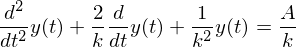


Generic solution:



In [2]:
#Equation solving 
Eq1 = sy.Eq(sy.Derivative(y(t),t,t) + 2*sy.Derivative(y(t),t)/k + y(t)/(k**2),(A/k))
print("aCsyn Differential equation:\n")
display(Eq1)

print("\nGeneric solution:\n")
y_sl0 = sy.dsolve(Eq1, y(t)).rhs  # take only right hand side
display(sy.Eq(y(t), y_sl0))


Particular solution with fixed params:



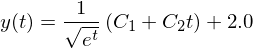


Solution with initial conditions:



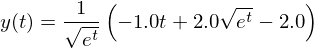

In [3]:
#Parameters setting for the initial conditions
a0=0.
b0=0.
k=2.
A=1.

#Equation with fixed parameters
Eq2 = sy.Eq(sy.Derivative(y(t),t,t) + 2*sy.Derivative(y(t),t)/k + y(t)/(k**2),(A/k))
print("\nParticular solution with fixed params:\n")
y_s20 = sy.dsolve(Eq2, y(t)).rhs  # take only right hand side
display(sy.Eq(y(t), y_s20))

# Initial conditions:
cnd0 = sy.Eq(y_s20.subs(t, 0), a0)  # y(0) = a0
cnd1 = sy.Eq(y_s20.diff(t).subs(t, 0), b0)  # y'(0) = b0

#  Solve for C1, C2:
C1, C2 = sy.symbols("C1, C2")  # generic constants
C1C2_sl = sy.solve([cnd0, cnd1], (C1, C2))

# Substitute back into solution:
y_sl1 = sy.simplify(y_s20.subs(C1C2_sl))
print("\nSolution with initial conditions:\n")
display(sy.simplify(sy.Eq(y(t), y_sl1)))

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# make a numpy-ready function from the sympy results
func = sy.lambdify(t, sy.simplify(sy.Eq(y(t), y_sl1)).rhs,"numpy")

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
xvals = np.arange(0, 50, 0.01)
yvals = []
for i in range(len(xvals)):
    value = xvals[i]
    yvals.append(func(value))

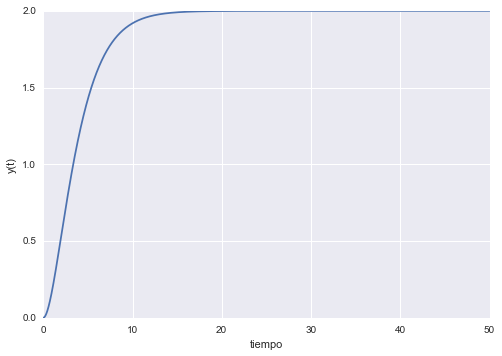

In [7]:
# make figure
plt.figure()  
plt.plot(xvals, yvals)
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.show()

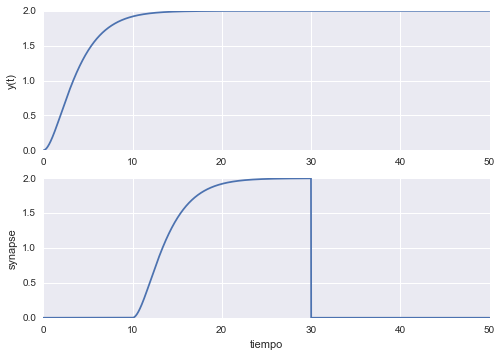

In [21]:
#Asumiendo vector con onset = 10ms
yvals2 = [0]*5000
yvals2[1000:3000] = yvals[0:2000]


# make figure
plt.figure()  
plt.subplot(211)
plt.plot(xvals, yvals)
plt.ylabel('y(t)')
plt.subplot(212)
plt.plot(xvals, yvals2)
plt.xlabel('tiempo')
plt.ylabel('synapse')
plt.show()

# <center> Avances al 12 de Febrero 2017 </center>

## Recopilación de soluciones
Revisando los foros de [neuron](https://www.neuron.yale.edu/phpBB/viewtopic.php?f=16&t=3007), encontré varios detalles interesantes:
1. *"First, at_time is deprecated, which means that it is strongly recommended that it not be used in new code development." (Carnevale, 2014)*
2. *"First, the assignment statements in a BREAKPOINT block are usually called twice per time step." (Carnevale & Hines, 2000).*  El tema con esto es que, si se llama al solve dentro del breakpoint, se deberá resolver la ecuación dos veces, lo cual lleva a un aumento en el tiempo de procesamiento.
3. *"Will they be electrotonically close to each other? or will they be at significantly different locations in the same cell (**or attached to different cells, which would be an equivalent computational burden**)?" (Carnevale, 2014)*
4. *"If f(v,y) is not linear in y, then the implicit integration method derivimplicit should be used. This provides first-order accuracy and is usable with general ODEs regardless of stiffness or nonlinearity".* En particular, al resolver la ecuación diferencial de aCsyn, es lineal, por tanto conviene más usar **cnexp**.
5. *With variable time step methods, no variable is assumed to be constant. These methods not only change the time step, but adaptively choose a numerical integration formula with local error that ranges from first-order up to $O(\Delta t^6)$. (Carnevale & Hines, 2000)*.

Con todo lo anterior, el problema al parecer, es que la ecuación es llamada muchísimas veces (2 veces por cada dt, por lo que dura la simulación, por la cantidad de sinapsis existentes.  Si además el dt es variable, se debe elegir la fórmula de integración, generando error además por cada iteración y empleando un método de recálculo, lo que hace que la simulación sea lenta.
**Se me ocurre que la mejor solución por ahora es: usar aCsyn con la ecuación explícita. En cada breakpoint llamar al procedimiento que asignará el valor de $a_1$ según sea el valor de tiempo ($t \in [t_{onset},t_{onset + dur}]$).
De esta manera, nos saltamos el integrador y la simulación debería ser más rápida.** (tal y como mencionó P.Orio en su solución "parche")


## Issues
Por alguna rara situación, no he podido correr los archivos que me pasó P.Orio.  
En particular, al llamar a "net5r_nseg3-read.hoc" obtengo el siguiente error
```bash
NEURON -- VERSION 7.4 (1380:90539e842093) 90539e842093
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2015
See http://www.neuron.yale.edu/neuron/credits

loading membrane mechanisms from /Users/Javier/Proyectos/CINV/experiments/benchmark/x86_64/.libs/libnrnmech.so
Additional mechanisms from files
 aCsyn.mod contsyn2.mod eCsyn.mod
	1 
	1 
	1 
	0 
	0 
/Applications/NEURON-7.4/nrn/x86_64/bin/nrniv: init not enough arguments
 in net5r_nseg3-read.hoc near line 40
 }
  ^
        SAC[0].init(4, 120, 29.0816, -0.559453, 3)
oc>
```

Algo similar pasa al llamar a "net5r_nseg3-aCsyn-read.hoc"
```bash
NEURON -- VERSION 7.4 (1380:90539e842093) 90539e842093
Duke, Yale, and the BlueBrain Project -- Copyright 1984-2015
See http://www.neuron.yale.edu/neuron/credits

loading membrane mechanisms from /Users/Javier/Proyectos/CINV/experiments/benchmark/x86_64/.libs/libnrnmech.so
Additional mechanisms from files
 aCsyn.mod contsyn2.mod eCsyn.mod
	1 
	1 
	1 
	0 
	0 
/Applications/NEURON-7.4/nrn/x86_64/bin/nrniv: init not enough arguments
 in net5r_nseg3-aCsyn-read.hoc near line 40
 }
  ^
        SAC[0].init(4, 120, 30, 0, 3)
oc>
```

# <center> Avances al 13 de Febrero de 2017 </center>

Para contrastar la hipótesis de que el cálculo de la derivada hace más lento al código, se testearon dos opciones: 
* La derivada se calcula directamente en el .mod. 

```C
INITIAL {
    a2=0
    a1=0
}

STATE {
    a1
    a2  (1/ms)
}

BREAKPOINT {
	at_time(onset)
	at_time(onset+dur)
    Astate()
    SOLVE states METHOD cnexp
    g = minG + (maxG - minG)* (a1 *1(ms)/tau)
    i = g * ( v - e )
}
	
DERIVATIVE states {
    LOCAL dz
    dz = A/tau - 2*a2/tau - a1/(tau^2)
    a2' = dz
    a1' = a2
}

PROCEDURE Astate() {
	if (t < onset + dur && t >= onset) {
		A = amp
	}else{
		A = 0
	}    
}
```


* La ecuación explícita de la alfa function es calculada y ejecutada en el .mod


```C
INITIAL {
    a1=0
}

STATE {
    a1
}

BREAKPOINT {
	at_time(onset)
	at_time(onset+dur)
    Astate()
    g = minG + (maxG - minG)* (a1 *1(ms)/tau)
    i = g * ( v - e )
}
	
PROCEDURE Astate() {
	if (t < onset + dur && t >= onset) {
		A = amp
        a1 = -A * (-tau * exp(t/tau) + tau + t)* exp(-t/tau)
	}else{
		A = 0
        a1 = 0
	}    
}
```

Estas opciones se testearon en sólo una simulación de estímulo y no para el set completo de modificaciones de conductancia.


## Outputs

Los resultados de la simulación son los siguientes
* Cálculo de la derivada
```bash
runfile('/Users/Javier/Proyectos/CINV/experiments/sac-red/code/aCsyn/net5module_aCsyn.py', wdir='/Users/Javier/Proyectos/CINV/experiments/sac-red/code/aCsyn')
Reloaded modules: neuron.hoc, neuron
100  Starburst Amacrine Cells created
3192  Bipolar Cells created
23078 Glutamatergic synaptic inputs created
8826 Gabaergic synaptic inputs
Gabaergic synaptic inputs created
working cells are 44, 54 and 65
Setting initial glutamatergic synapse
Now will set gabaergic synapse parameters
Parameters OK, Equilibrium simulation started
RUN, Neuron...RUN!
Saving equilibrium outputs
Equilibrium simulation finished
init sc1 and sc2 in core -1
Experiment started.  Creating excitatory conductances
creating stimuli
Creating recording vector for amacrines...
...and for synapses
Simulation: Started
Simulation: Ended (Yay!)
Elapsed Time:  1698.29393601 seconds
Now ploting. You could check the figures in ./simulation/2017-02-13
Total Execution time: 3248.34497905 secondsca
```

* Cálculo explícito de la sinapsis

```bash
runfile('/Users/Javier/Proyectos/CINV/experiments/sac-red/code/aCsyn/net5module_aCsyn.py', wdir='/Users/Javier/Proyectos/CINV/experiments/sac-red/code/aCsyn')
Reloaded modules: neuron.hoc, zmq.utils.garbage, neuron
100  Starburst Amacrine Cells created
3192  Bipolar Cells created
23078 Glutamatergic synaptic inputs created
8826 Gabaergic synaptic inputs
Gabaergic synaptic inputs created
working cells are 44, 54 and 65
Setting initial glutamatergic synapse
Now will set gabaergic synapse parameters
Parameters OK, Equilibrium simulation started
RUN, Neuron...RUN!
Saving equilibrium outputs
Equilibrium simulation finished
init sc1 and sc2 in core -1
Experiment started.  Creating excitatory conductances
creating stimuli
Creating recording vector for amacrines...
...and for synapses
Simulation: Started
Simulation: Ended (Yay!)
Elapsed Time:  1613.22174287 seconds
Now ploting. You could check the figures in ./simulation/2017-02-12
Total Execution time: 3055.42630887 seconds
```


## Comparación de las simulaciones
Para analizar si las simulaciones eran equivalentes entre ellas, se muestra el gráfico obtenido de la simulación de las células 44, 54, 65

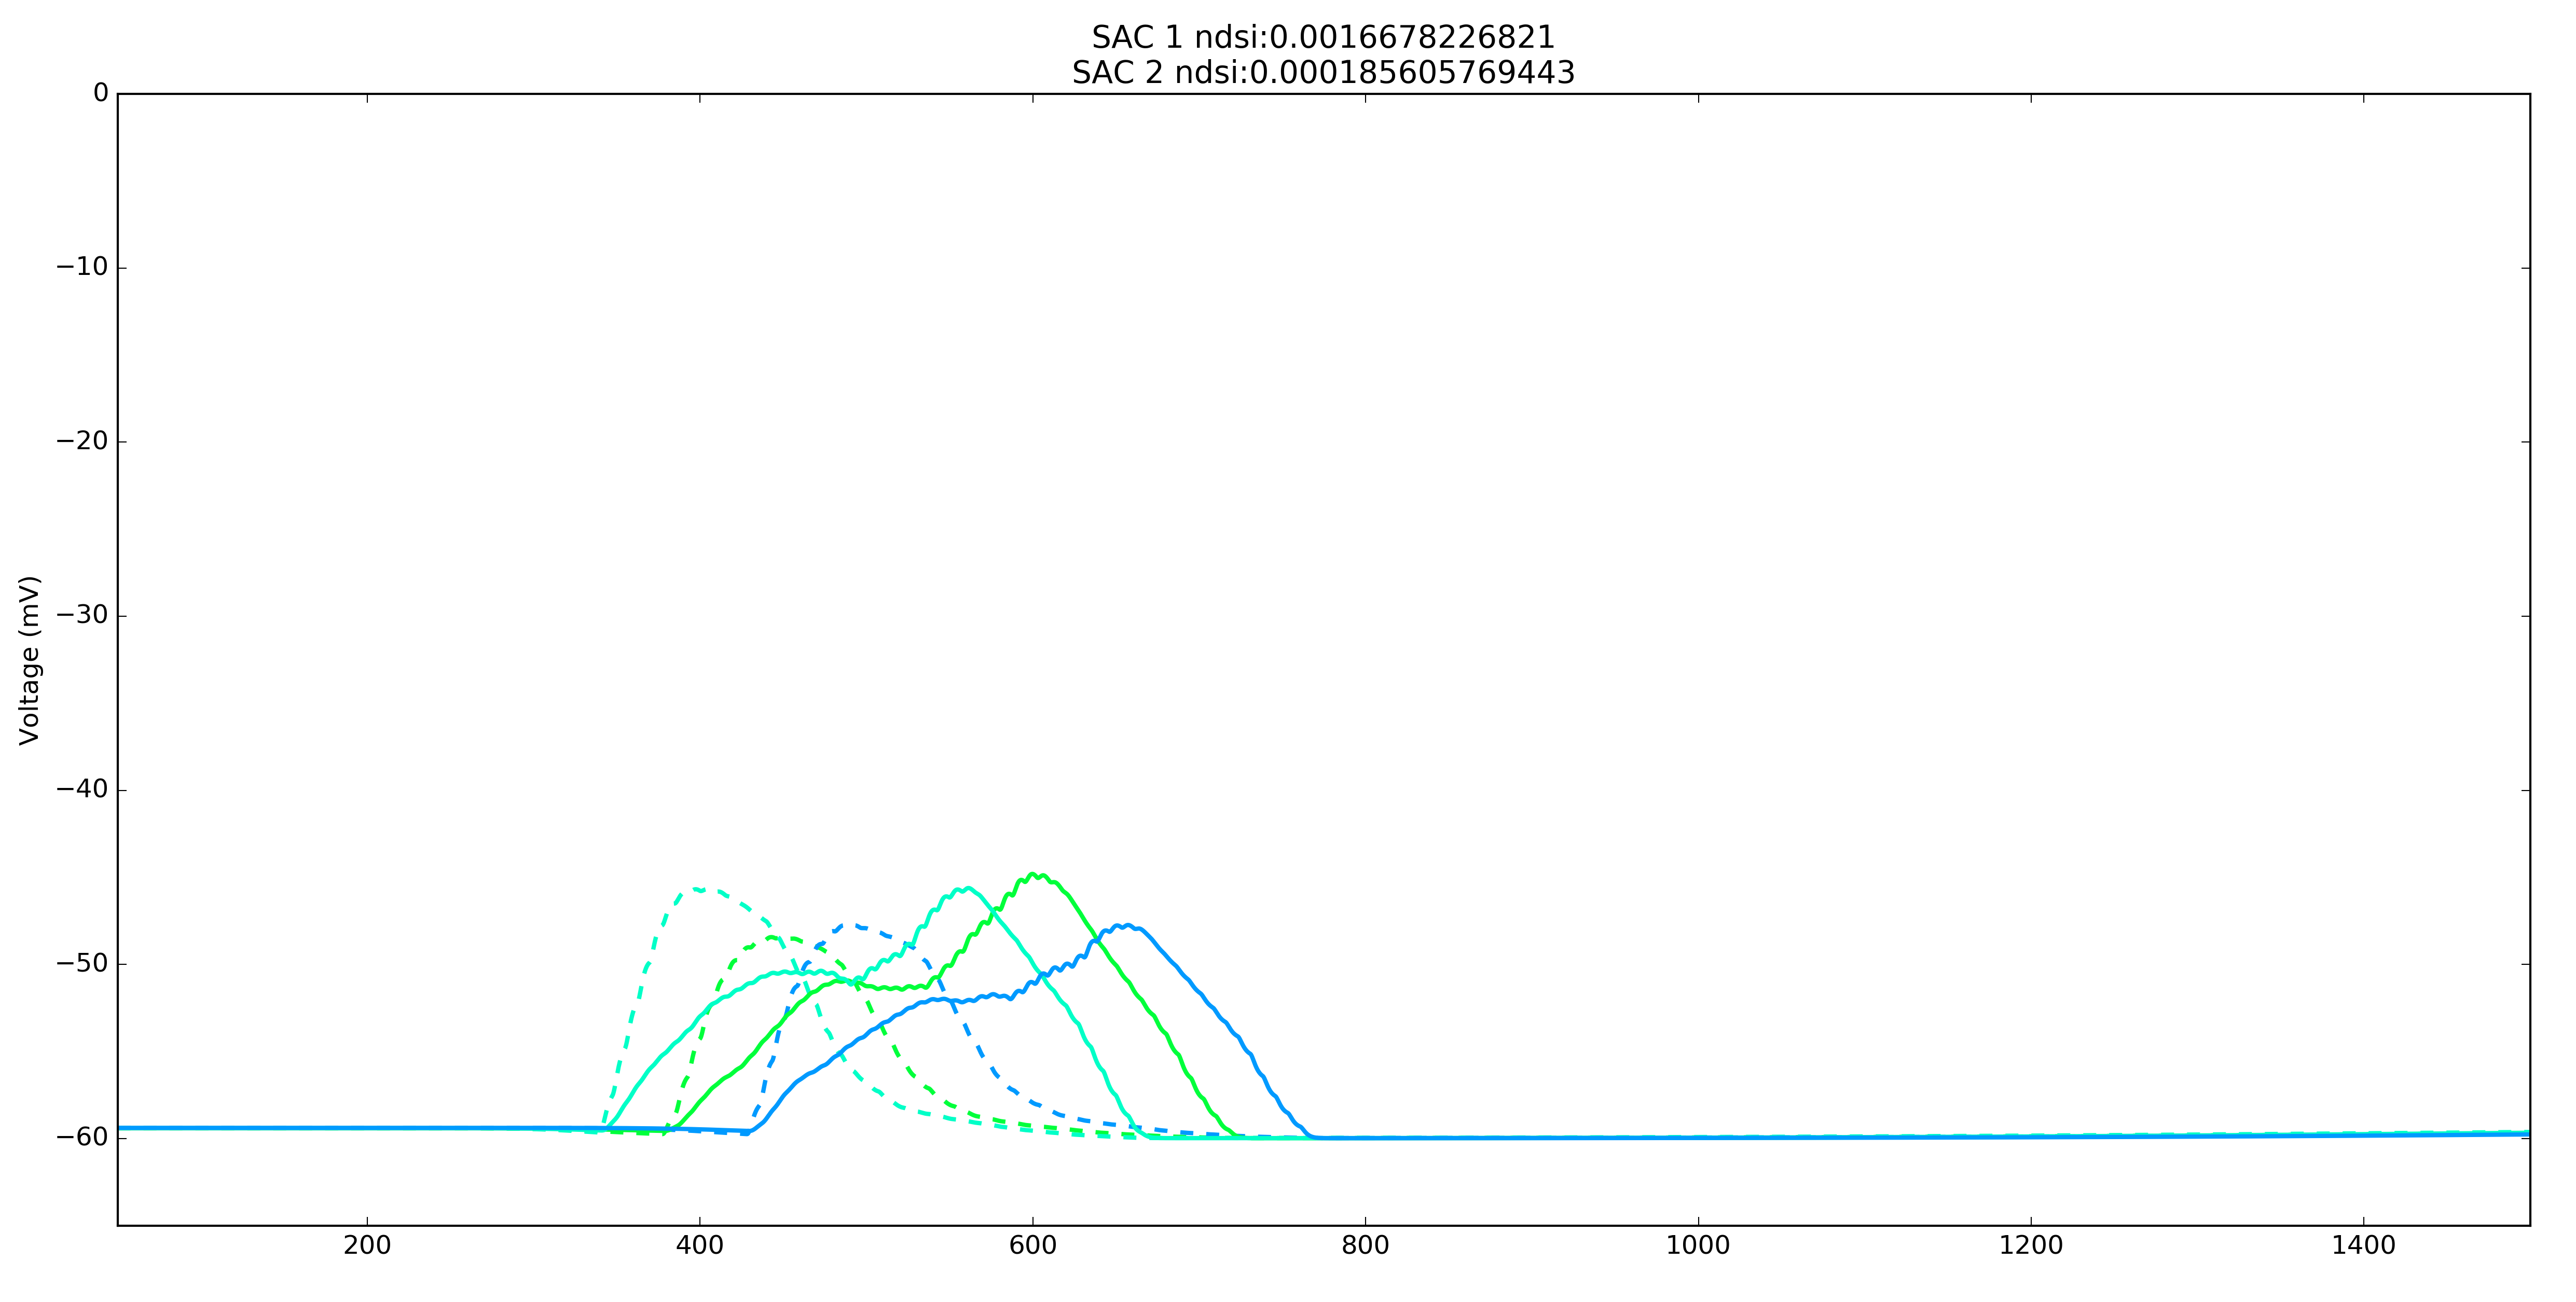

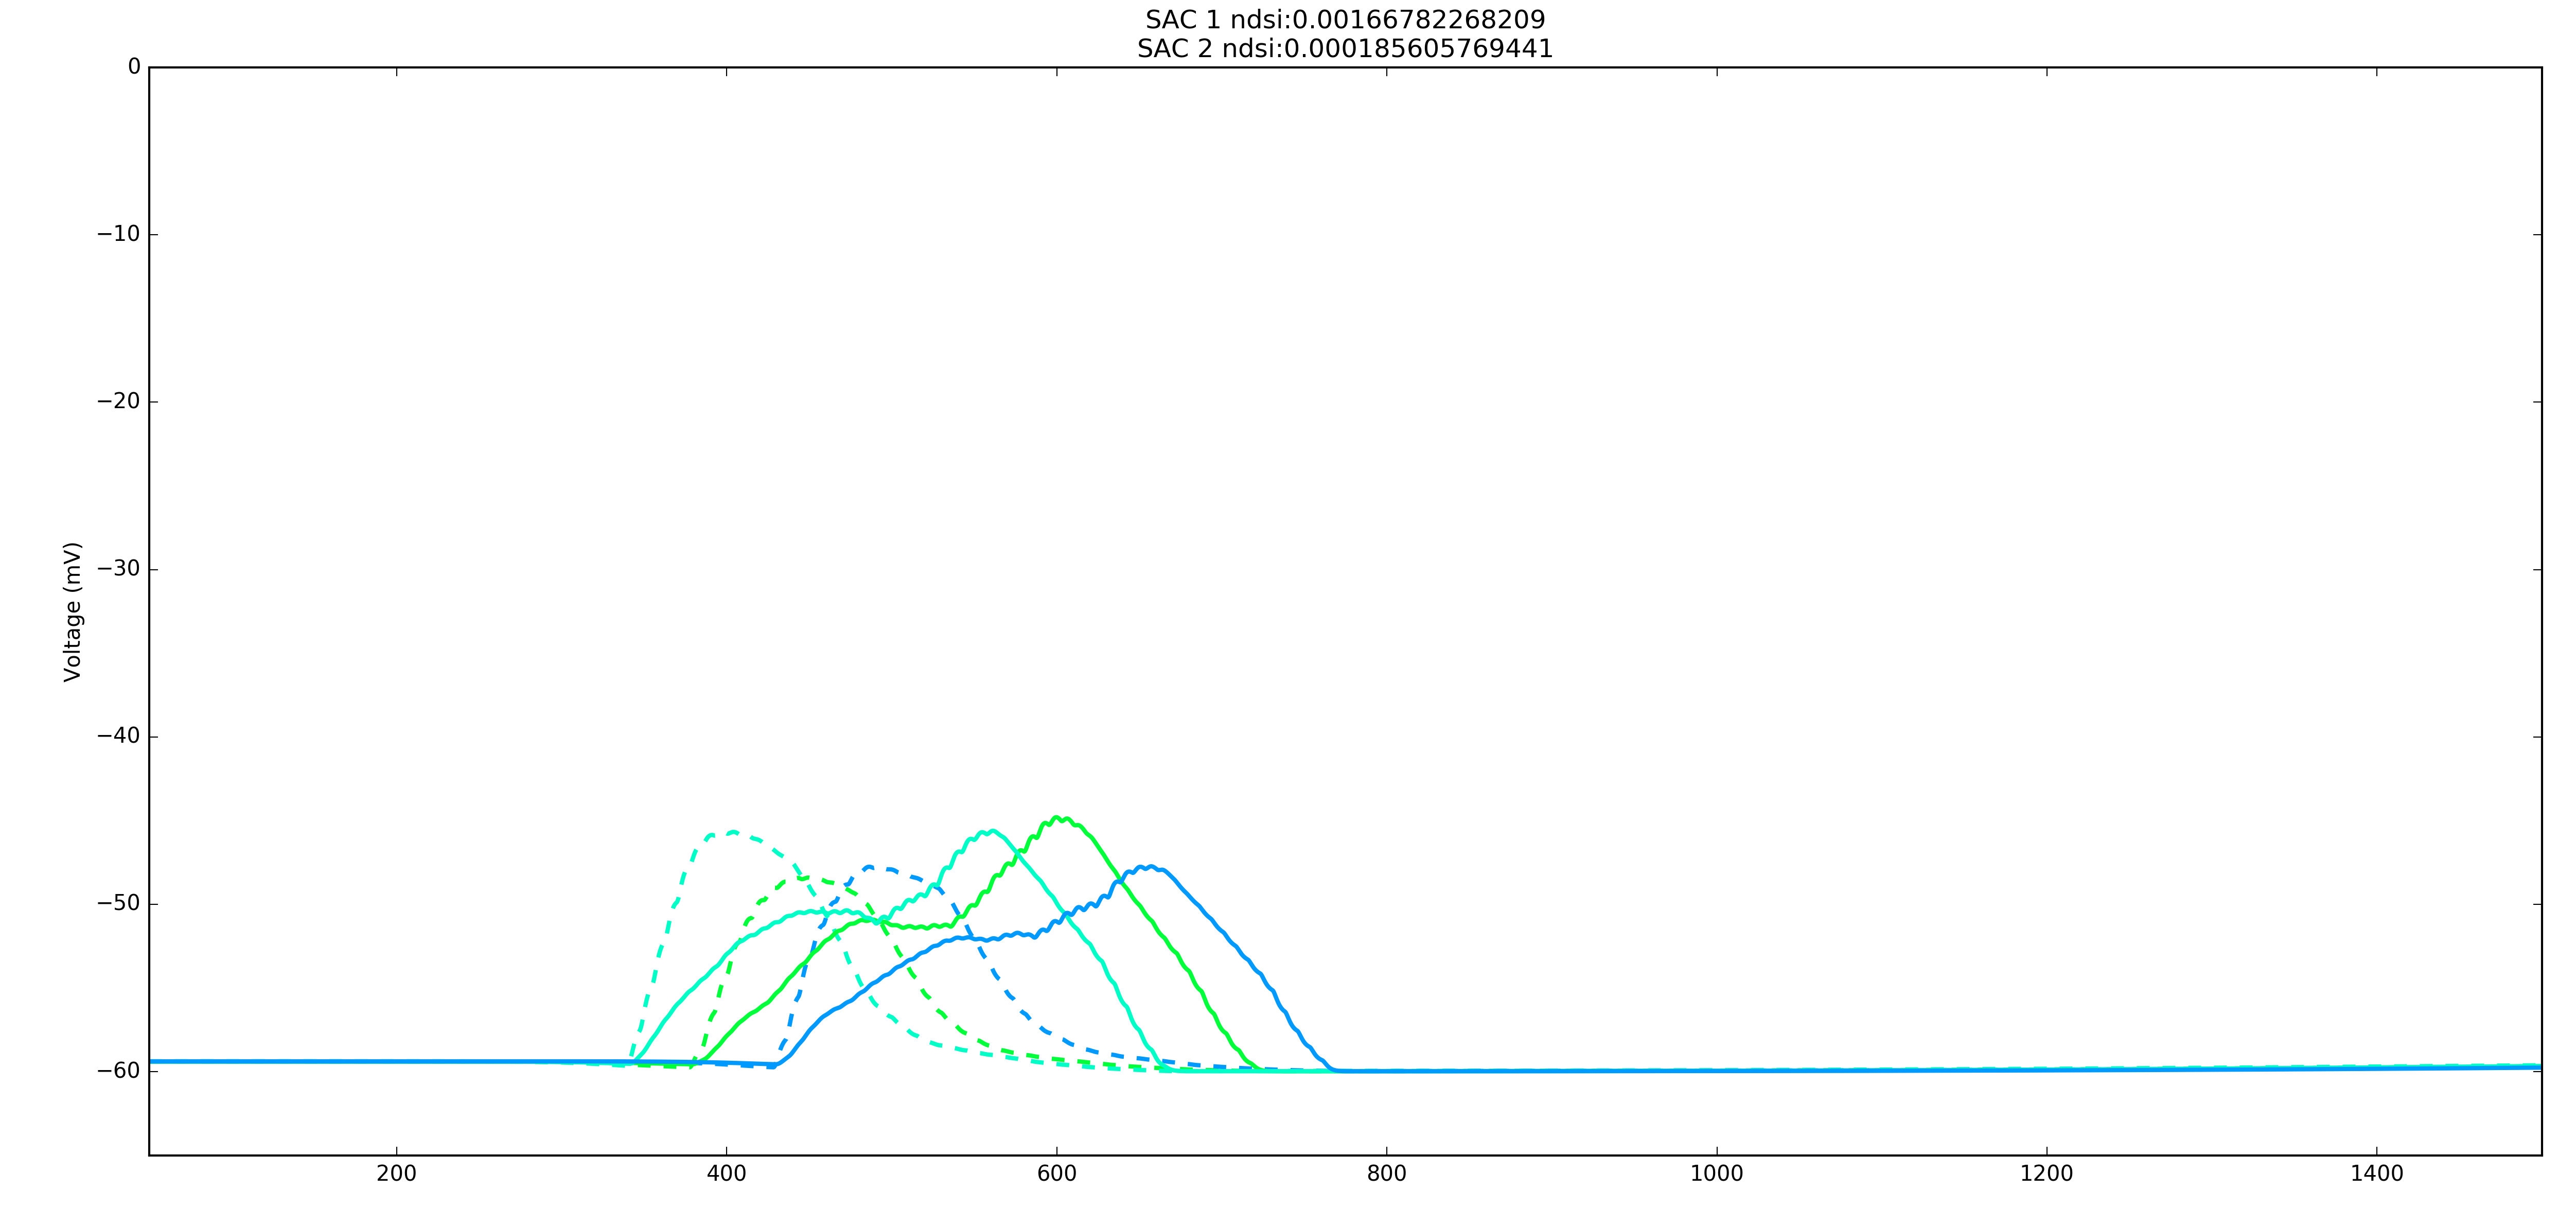

In [255]:
from IPython.display import Image, HTML, display
from glob import glob

display(Image(filename='img/derivate_benchmark.png', embed=True))
display(Image(filename='img/analitic_benchmark.png', embed=True))


En la figura superior se observa el resultado de la simulación, empleando el método de cálculo de derivada en el .mod.
La figura inferior muestra la simulación, pero ahora utilizando la ecuación explícita en el archivo .mod

## Comparación de los tiempos de ejecución

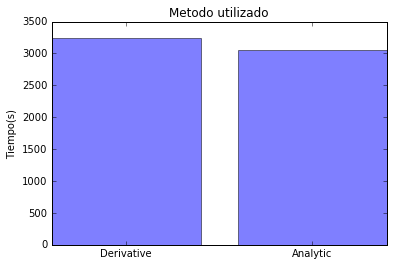

diferencia en tiempo de ejecucion: 192.91867018 [s]


In [257]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
run_time = [3248.34497905, 3055.42630887]
objects = ('Derivative', 'Analytic')
y_pos = np.arange(len(objects))

plt.bar(y_pos, run_time, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tiempo(s)')
plt.title('Metodo utilizado')
plt.show()
print "diferencia en tiempo de ejecucion: %s [s]" %(run_time[0] - run_time[1])

Se observa entonces que la ejecución con cálculo explícito de la función alfa es ligeramente más rápida.  Esto podría tener un impacto en la simulación general, sin embargo no es mucha la diferencia existente (192.919[s]).
Ambas simulaciones fueron corridas en un MacBook Pro (Proc:2,4 GHz Intel Core 2 Duo; RAM: 4 GB 1067 MHz DDR3; Gráficos: NVIDIA GeForce 320M 256 MB).
Primero se corrió la simulación con derivada, luego la simulación analítica y nuevamente la simulación con derivada.  Estas dos últimas simulaciones fueron las utilizadas para el análisis.

## Simulación de una grid de parámetros

Se simuló la rejilla de parámetros de datos para la red neuronal, es decir

```python
gmax = np.logspace(-6, -3, 2)  #np.logspace(-6, -3, 29)
stimuliSpeed = np.logspace(-1, 2, 2) #np.logspace(-1, 2, 29)
```
Esta simulación fue realizada en el Cluster de cómputo del CINV (specs??)

Los resultados de salida son los siguientes:

* Derivada en .mod
```bash
Time elapsed:  2387.950243 s
Total Execution time: 2387.99236989 seconds
```
* Ecuación analítica en .mod
```bash
Time elapsed:  1812.56717706 s
Total Execution time: 1812.59710979 seconds
```

Además, se adjuntan los logs de la salida de slurm.


In [118]:
derivate = [[1.00000000e-01,1.00000000e-06,3.00000000e+01,1.00000000e-01,
             1.31882994e-04,1.37337343e-04,1.49218077e-04,-3.62967379e-03,
             -8.15438570e-03,5.17733820e-03,1.21229977e-05,1.33795788e-05,
             1.33128768e-05,-2.82095082e-03,-8.05479524e-03,4.66571381e-03,
             8.46672605e-06,9.32980809e-06,9.24535879e-06,-3.51608497e-03,
             -8.71161987e-03,4.79982637e-03],
            [1.00000000e+02,1.00000000e-06,3.00000000e+01,1.00000000e+02,
             4.75073472e+00,4.81217563e+00,4.88305619e+00,-1.53612750e-03,
             -1.03873759e-02,2.30004024e-03,6.11138093e-03,6.41778642e-03,
             6.60121273e-03,-3.50382988e-03,-3.22410964e-02,7.91303059e-03,
             1.85141638e-03,1.94764580e-03,1.99471971e-03,-3.54670509e-03,
             -3.23747050e-02,7.80481061e-03],
            [1.00000000e-01,1.00000000e-03,3.00000000e+01,1.00000000e-01,
             1.87339787e-03,3.32629290e-03,1.30705505e-03,-3.25050144e-01,
             -2.04115949e-01,-3.46697048e-01,1.46595316e-05,1.46862691e-05,
             1.57213961e-05,-6.57197791e-02,-3.40034250e-02,-4.92957087e-02,
             7.99821775e-06,5.27537035e-07,1.03877669e-05,1.37978940e-01,
             -1.10447166e+00,-3.66035756e-02],
            [1.00000000e+02,1.00000000e-03,3.00000000e+01,1.00000000e+02,
             5.71373407e+01,5.71518708e+01,5.71959191e+01,1.94119384e-03,
             -1.48922454e-03,2.50418230e-03,8.71535374e-01,8.71538167e-01,
             8.71552440e-01,7.63402319e-06,-5.08507532e-05,2.55081539e-05,
             3.72319346e-01,3.72365063e-01,3.72433353e-01,3.08856901e-05,
             -4.53670337e-04,1.84614089e-04]]

analitic = [[1.00000000e-01,1.00000000e-06,3.00000000e+01,1.00000000e-01
             , 1.31469286e-04,1.36863965e-04,1.48757049e-04,-3.66392097e-03
             ,-8.17209626e-03,5.17014680e-03,1.21427843e-05,1.33967448e-05
             , 1.33359009e-05,-2.81622053e-03,-7.95164571e-03,4.66464030e-03
             , 8.48476310e-06,9.34594272e-06,9.26528607e-06,-3.51248091e-03
             ,-8.59612718e-03,4.80306112e-03],
            [1.00000000e+02,1.00000000e-06,3.00000000e+01,1.00000000e+02
             , 4.75325768e+00,4.81435291e+00,4.88561307e+00,-1.53739756e-03
             ,-1.03865475e-02,2.30009499e-03,6.15644241e-03,6.46268009e-03
             , 6.64832873e-03,-3.03990524e-03,-3.19241827e-02,8.35175055e-03
             , 1.86228549e-03,1.95829866e-03,2.00596091e-03,-3.05727593e-03
             ,-3.20422036e-02,8.26930460e-03],
            [1.00000000e-01,1.00000000e-03,3.00000000e+01,1.00000000e-01
             , 1.87126426e-03,3.32158255e-03,1.30610599e-03,-3.24977100e-01
             ,-2.03845425e-01,-3.46801846e-01,1.46740122e-05,1.46823519e-05
             , 1.57524779e-05,-6.56080041e-02,-3.34248008e-02,-4.90435466e-02
             , 7.98095753e-06,4.53561692e-07,1.04139163e-05,1.42694245e-01
             ,-1.08773668e+00,-3.67167976e-02],
            [1.00000000e+02,1.00000000e-03,3.00000000e+01,1.00000000e+02
             , 5.87512827e+01,5.87224353e+01,5.87461027e+01,3.00497257e-03
             , 1.67611603e-03,3.14361832e-03,8.70803329e-01,8.70788094e-01
             , 8.70775840e-01,2.57456624e-05,3.00068478e-05,2.26206753e-05
             , 3.70019539e-01,3.70008820e-01,3.69992959e-01,1.48214487e-04
             , 1.31808729e-04,1.46837352e-04]]

In [144]:
x = np.asarray(analitic)
y = np.asarray(derivate)
a = np.subtract(x,y)

Para poder comparar de mejor forma los datos, y dado que éstos presentan una gran varianza, preferí hacer una transformación del espacio de valores usando logaritmo. Sin embargo, existen números negativos, por lo tanto, fue necesario realizar una transformación un poco diferente, que es la que se explica a continuación.
### Translate, then Transform
A common technique for handling negative values is to add a constant value to the data prior to applying the log transform. The transformation is therefore log(Y+a) where a is the constant. Some people like to choose a so that min(Y+a) is a very small positive number (like 0.001). Others choose a so that min(Y+a) = 1. For the latter choice, you can show that a = b – min(Y), where b is either a small number or is 1.

In [146]:
LogY = np.log(y + 1 - np.min(y))
LogX = np.log(x + 1 - np.min(x))
LogA = np.log(a + 1 - np.min(a))


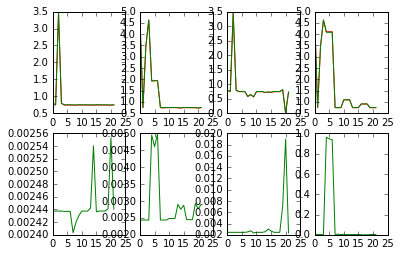

In [149]:
plt.figure()
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.plot(LogX[i],'r')
    plt.plot(LogY[i],'g')
    plt.subplot(2,4,i+5)
    plt.plot(LogA[i],'g')
plt.show()


En los paneles superiores se muestran los resultados de salida para ambas simulaciones.  
Los paneles inferiores muestran el error entre las simulaciones.  Notar que se está graficando $\log{(y_i + 1 -min(Y))}$

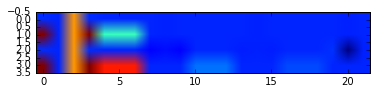

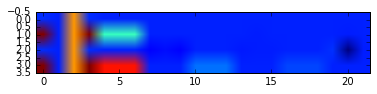

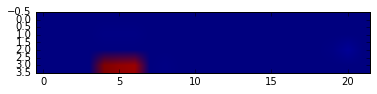

In [147]:
plt.imshow(LogY, cmap='jet')
plt.show()
plt.imshow(LogX)
plt.show()
plt.imshow(LogA)
plt.show()

El heatmap superior muestra los valores obtenidos empleando la derivada.
El heatmap del medio muestra los valores obtenidos empleando el método de la ecuación explícita.
El heatmap inferior muestra el error entre ambos métodos

Sin embargo, aún no es posible establecer si los datos difieren mucho entre ellos o no. Para compararlos, se realizará un ajuste por mínimos cuadrados.  La hipótesis es que los datos de la ecuación analítica son MUY semejantes a los datos entregados por el método de la derivada.  Para ello, se analizará el valor de la pendiente $(\hat{\alpha})$ y el intercepto $(\hat{\beta})$.  
Idealmente, $\hat{\alpha} = 1$ y $\hat{\beta}=0$, donde $Y = \hat{\alpha}X + \hat{\beta}$

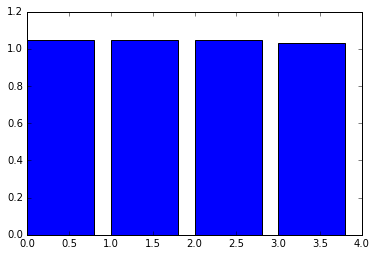

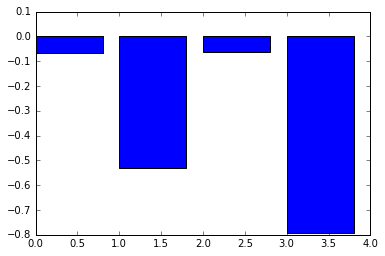

In [201]:
alfa =[]
beta = []

for i in range(4):
    a = (np.cov(x[i],y[i])[1][1])/np.var(x[i])
    b = np.mean(y[i]) - a*np.mean(x[i])
    alfa.append(a)
    beta.append(b)
samples = np.arange(len(alfa))

plt.bar(samples,alfa)
plt.show()
plt.bar(samples,beta)
plt.show()

In [202]:
print np.mean(alfa)
print np.mean(beta)

1.04350772656
-0.362699135953


Se observa que los datos no son exactos.  Si bien el método de la ecuación analítica entrega un resultado bastante aproximado, no es 100% preciso. Esto es debido a un error entregado en la simulación usando la ecuación analítica. NEURON parece no poder calcular $\exp(k), k<700$.  Debido a esto, aproximó ciertos valores en la exponencial.  

Sin embargo, conviene además tomar en cuenta los tiempos requeridos para cada cálculo.

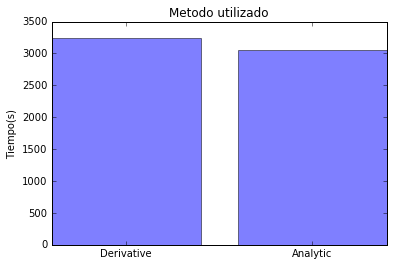

diferencia en tiempo de ejecucion: 575.3952601 [s]


In [244]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tiempos = [2387.99236989, 1812.59710979]
objects = ('Derivative', 'Analytic')
y_pos = np.arange(len(objects))

plt.bar(y_pos, run_time, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tiempo(s)')
plt.title('Metodo utilizado')
plt.show()
print "diferencia en tiempo de ejecucion: %s [s]" %(tiempos[0] - tiempos[1])


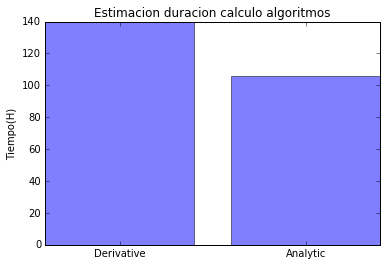

diferencia en tiempo de ejecucion: 33.60468151 [h]


In [223]:
theoric_full_sim_derivate = (29*29*tiempos[0]/4)/3600
theoric_full_sim_analitic = (29*29*tiempos[1]/4)/3600

theoric = [theoric_full_sim_derivate, theoric_full_sim_analitic]
objects = ('Derivative', 'Analytic')
y_pos = np.arange(len(objects))

plt.bar(y_pos, theoric, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tiempo(H)')
plt.title('Estimacion duracion calculo algoritmos')
plt.show()
print "diferencia en tiempo de ejecucion: %s [h]" %(theoric[0] - theoric[1])


Esta diferencia en tiempo es de casi 1.5 días.  Si se contempla la cantidad de experimentos que se deben hacer (ver la [tabla](#Listado-de-experimentos) del día 21 de Diciembre), el ahorro en tiempo es de aproximadamente 10 días

# <center> Avances al 14 de Febrero 2017 </center>

* Simulación con la grilla de 29x29 en el cluster CINV, usando el método de la derivada. iniciado a las 01:43